# Titanic: Machine Learning from Disaster

## Data preparation

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [68]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic_df.shape

(891, 12)

In [70]:
titanic_df=titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],1)
titanic_df=pd.get_dummies(titanic_df)
titanic_df.dropna(inplace=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [71]:
titanic_df.shape

(714, 11)

### prepare training data

In [72]:
from sklearn.cross_validation import train_test_split
X=titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Embarked_C','Embarked_Q']]
y=titanic_df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.6)

In [73]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
79,3,30.0,0,0,12.4750,1.0,0.0,0.0
421,3,21.0,0,0,7.7333,0.0,0.0,1.0
445,1,4.0,0,2,81.8583,0.0,0.0,0.0
483,3,63.0,0,0,9.5875,1.0,0.0,0.0
452,1,30.0,0,0,27.7500,0.0,1.0,0.0


In [74]:
X_train.shape

(428, 8)

###  prepare validation and test data

In [75]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

### ROC curve plot

In [76]:
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

def ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, title):
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_train_prob[:,1])
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,y_test_prob[:,1])
    roc_auc_test = metrics.auc(fpr_test, tpr_test)

    fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_val_prob[:,1])
    roc_auc_val = metrics.auc(fpr_val, tpr_val)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_test, tpr_test, color = 'g')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")

In [77]:
def ROCplot2(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, title):
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_train_prob)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,y_test_prob)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)

    fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_val_prob)
    roc_auc_val = metrics.auc(fpr_val, tpr_val)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_test, tpr_test, color = 'g')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")

# Data analysis

## Logistic Regression

In [78]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty='l1', C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [79]:
print ('Accuracy:', logreg.score(X_test, y_test), logreg.score(X_val, y_val))

('Accuracy:', 0.74825174825174823, 0.80419580419580416)


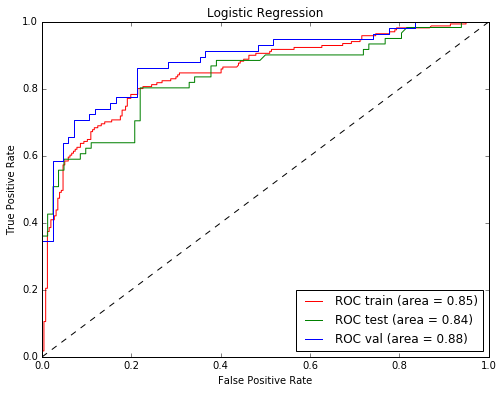

In [80]:
y_train_prob = logreg.predict_proba(X_train)
y_test_prob = logreg.predict_proba(X_test)
y_val_prob = logreg.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Logistic Regression')

**Comparison with statsmodels**:

In [81]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

X_train=sm.add_constant(X_train)
X_val=sm.add_constant(X_val)
X_test=sm.add_constant(X_test)

logit = Logit(y_train,X_train)
result=logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.456176
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  428
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Mar 2017   Pseudo R-squ.:                  0.3220
Time:                        13:05:31   Log-Likelihood:                -195.24
converged:                       True   LL-Null:                       -287.97
                                        LLR p-value:                 7.376e-36
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7156      0.766      2.241      0.025         0.215     3.216
Pclass        -0.9971      0.

In [82]:
result.params

const         1.715580
Pclass       -0.997131
Age          -0.033417
SibSp        -0.290079
Parch         0.140752
Fare          0.004251
Sex_female    2.346572
Embarked_C    0.657276
Embarked_Q   -0.929469
dtype: float64

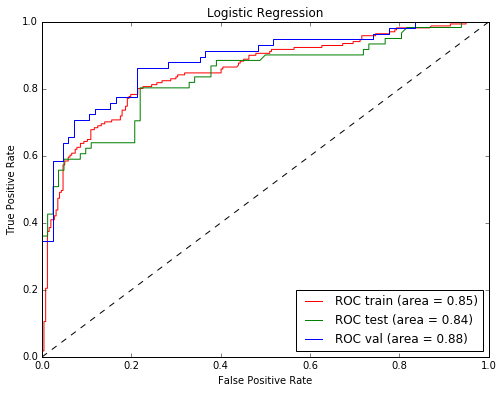

In [83]:
y_train_prob = result.predict(X_train)
y_test_prob = result.predict(X_test)
y_val_prob = result.predict(X_val)
ROCplot2(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Logistic Regression')

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
print ('Accuracy:', gnb.score(X_test, y_test), gnb.score(X_val, y_val))

('Accuracy:', 0.76923076923076927, 0.74825174825174823)


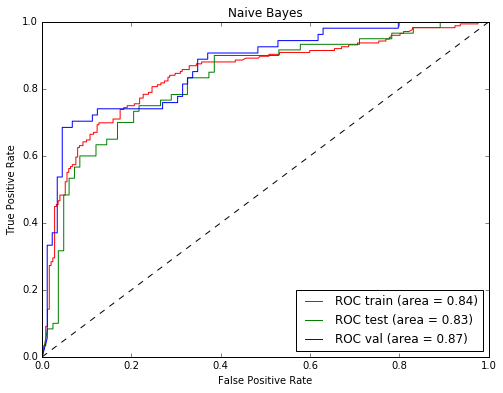

In [16]:
y_train_prob = gnb.predict_proba(X_train)
y_test_prob = gnb.predict_proba(X_test)
y_val_prob = gnb.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Naive Bayes')

## Linear Discriminant Analysis

In [17]:
from sklearn.lda import LDA
lda = LDA()
lda.fit(X_train, y_train)

/Users/chenyinglong/anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
print ('Accuracy:', lda.score(X_test, y_test), lda.score(X_val, y_val))

('Accuracy:', 0.71328671328671334, 0.77622377622377625)


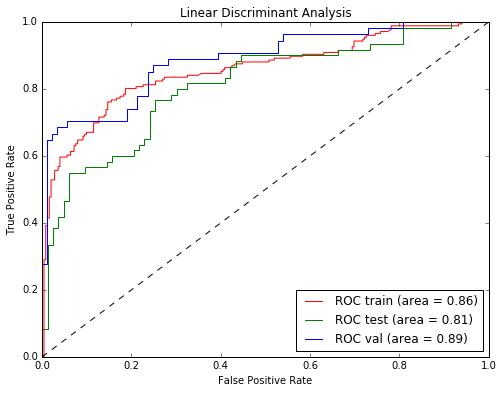

In [19]:
y_train_prob = lda.predict_proba(X_train)
y_test_prob = lda.predict_proba(X_test)
y_val_prob = lda.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Linear Discriminant Analysis')

## Quadratic Discriminant Analysis

In [20]:
from sklearn.qda import QDA
qda = QDA()
qda.fit(X_train, y_train)

/Users/chenyinglong/anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [21]:
print ('Accuracy:', qda.score(X_test, y_test), qda.score(X_val, y_val))

('Accuracy:', 0.76223776223776218, 0.80419580419580416)


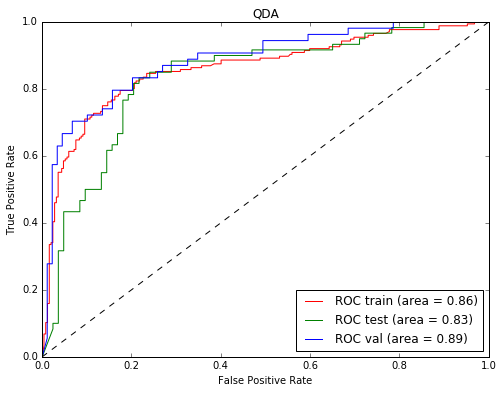

In [22]:
y_train_prob = qda.predict_proba(X_train)
y_test_prob = qda.predict_proba(X_test)
y_val_prob = qda.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'QDA')

## Support Vector Machine

### linear kernel

In [23]:
from sklearn import svm
C =1.0
svc = svm.SVC(kernel='linear', probability=True, C=C)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
print ('Accuracy: ', svc.score(X_test, y_test), svc.score(X_val, y_val))

('Accuracy: ', 0.71328671328671334, 0.78321678321678323)


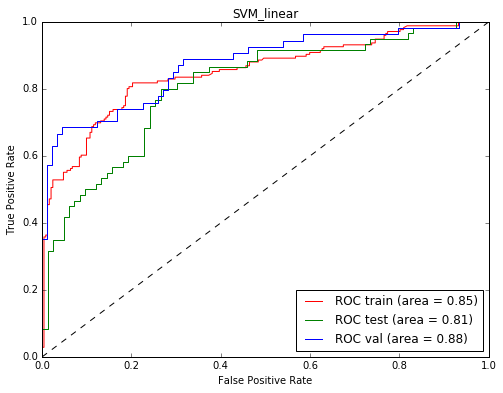

In [25]:
y_train_prob = svc.predict_proba(X_train)
y_test_prob = svc.predict_proba(X_test)
y_val_prob = svc.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'SVM_linear')

### rbf kernel

In [26]:
rbf_svc = svm.SVC(kernel='rbf',probability=True, C=C)
rbf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
print ('Accuracy: ', rbf_svc.score(X_test, y_test), rbf_svc.score(X_val, y_val))

('Accuracy: ', 0.76923076923076927, 0.65734265734265729)


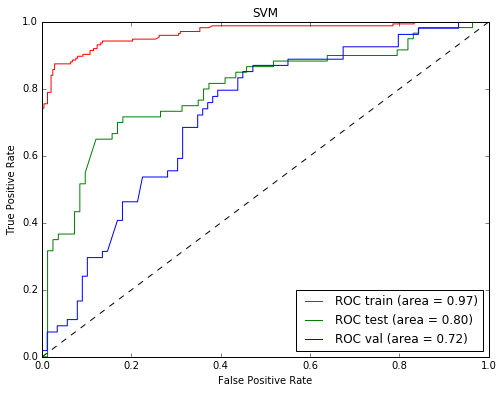

In [28]:
y_train_prob = rbf_svc.predict_proba(X_train)
y_test_prob = rbf_svc.predict_proba(X_test)
y_val_prob = rbf_svc.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'SVM')

## K-nearest neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier
best_k = 1
best_acc = 0
for n_neighbors in [1,2,3,5,10,20,30,50]:
    KNN = KNeighborsClassifier(n_neighbors)
    KNN.fit(X_train, y_train)
    acc = KNN.score(X_val, y_val)
    print (n_neighbors, acc)
    if acc > best_acc:
        best_k = n_neighbors
        best_acc = acc

print('best K is:', best_k)

(1, 0.64335664335664333)
(2, 0.67832167832167833)
(3, 0.69930069930069927)
(5, 0.67132867132867136)
(10, 0.67132867132867136)
(20, 0.65734265734265729)
(30, 0.65034965034965031)
(50, 0.63636363636363635)
('best K is:', 3)


In [30]:
KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
print('Accuracy: ', KNN.score(X_test, y_test), KNN.score(X_val, y_val))

('Accuracy: ', 0.74825174825174823, 0.69930069930069927)


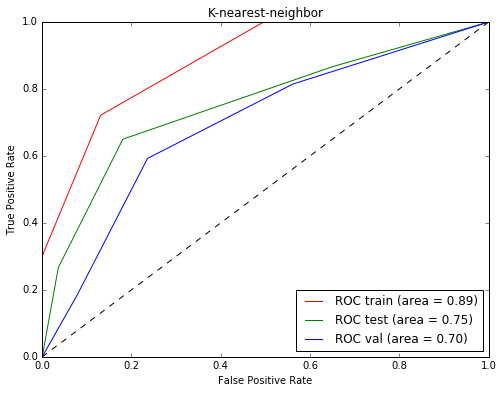

In [32]:
y_train_prob = KNN.predict_proba(X_train)
y_test_prob  = KNN.predict_proba(X_test)
y_val_prob   = KNN.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'K-nearest-neighbor')

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

rf = RandomForestClassifier(n_estimators=6)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
print ('Accuracy:', rf.score(X_test, y_test), rf.score(X_val, y_val))

('Accuracy:', 0.74125874125874125, 0.79020979020979021)


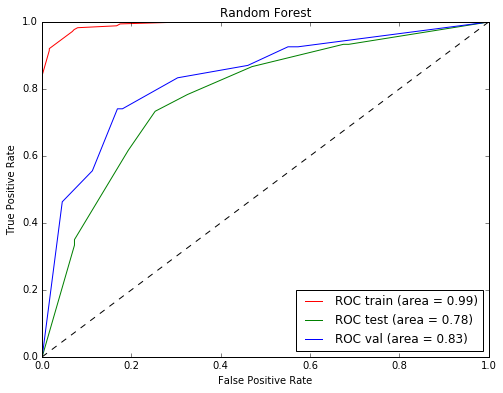

In [35]:
y_train_prob = rf.predict_proba(X_train)
y_test_prob = rf.predict_proba(X_test)
y_val_prob = rf.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Random Forest')

In [36]:
from sklearn import grid_search
rf = RandomForestClassifier()
parameters = {'n_estimators': [2,4,6],'max_depth':[5,10,15],'min_samples_leaf':[10,20]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)
model_cv_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_estimators=2, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=2, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=2, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=4, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=2, max_depth=5, min_samples_leaf=10 -   0.0s
[CV] ....... n_estimators=2, max_depth=5, min_samples_leaf=10 -   0.0s
[CV] n_estimators=4, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=4, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=4, max_depth=5, min_samples_leaf=10 -   0.0s
[CV] ....... n_estimators=2, max_depth=5, min_samples_leaf=10 -   0.0s
[CV] n_estimators=6, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=6, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=4, max_depth=5, min_samples_leaf=10 -   0.0s
[CV] ....... n_e

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 4, 6], 'max_depth': [5, 10, 15], 'min_samples_leaf': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [37]:
best_model = model_cv_grid.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
model_tuned = best_model

In [39]:
model_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

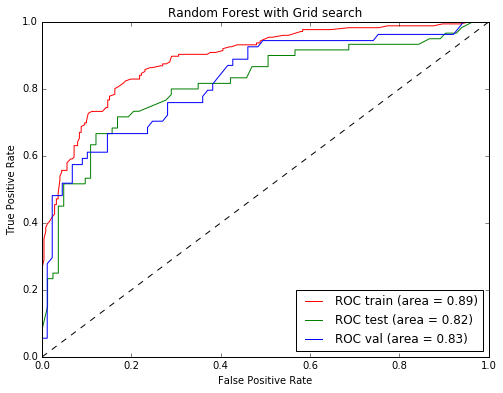

In [40]:
y_train_prob = model_tuned.predict_proba(X_train)
y_test_prob = model_tuned.predict_proba(X_test)
y_val_prob = model_tuned.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Random Forest with Grid search')

In [41]:
print ('Accuracy:', model_tuned.score(X_test, y_test), model_tuned.score(X_val, y_val))

('Accuracy:', 0.76923076923076927, 0.74125874125874125)


In [42]:
importance = model_tuned.feature_importances_
attribute = X.columns

v = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
sorted_importance = [importance[i] for i in v]
sorted_attribute = [attribute[i] for i in v]

df_importance = pd.DataFrame({'variable': sorted_attribute, 'importance' : sorted_importance})
df_importance.sort_index().head(8)

,importance,variable
0,0.451778,Sex_female
1,0.234962,Age
2,0.148051,Fare
3,0.094184,Pclass
4,0.060146,SibSp
5,0.010879,Parch
